## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

1. Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.

In [6]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/erinmoulton/kmc/main/data/airbnb_hw.csv',
               low_memory = False)
df['price'] = df['Price']
df['beds'] = df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']
X= df.loc[:,['price','beds','n_reviews','score']]
print(X.shape)
X.describe()

(30478, 4)


,beds,n_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [ ]:
#cleaning price by replacing commas and changing to numeric
X['price'].value_counts()
X['price']= X['price'].str.replace(',','')
X['price']= pd.to_numeric(X['price'], errors='coerce')
X.describe()

In [12]:
# and clean beds by getting rid of nas -> NaN
X['beds'] = X['beds'].fillna(1)
X.describe()

,price,beds,n_reviews,score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
# n_reviews is good

In [13]:
# clean review_score:
pd.crosstab(df['score'].isnull(), df['n_reviews']>0)

n_reviews,False,True
score,,
False,0,22155
True,7814,509


In [ ]:
#dropping the NAs for review_score
X= X.dropna()
X.describe()
#everything is clean!

2. Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

In [16]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

Z = X.drop('price',axis=1)
Z = Z.apply(maxmin)

3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.

In [21]:
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt


model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model for
model = model.fit(Z) # Fit the emodel
Z['cluster'] = model.labels_
Z.describe()

,beds,n_reviews,score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,1.414218
std,0.065205,0.094954,0.110630,1.528900
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,0.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

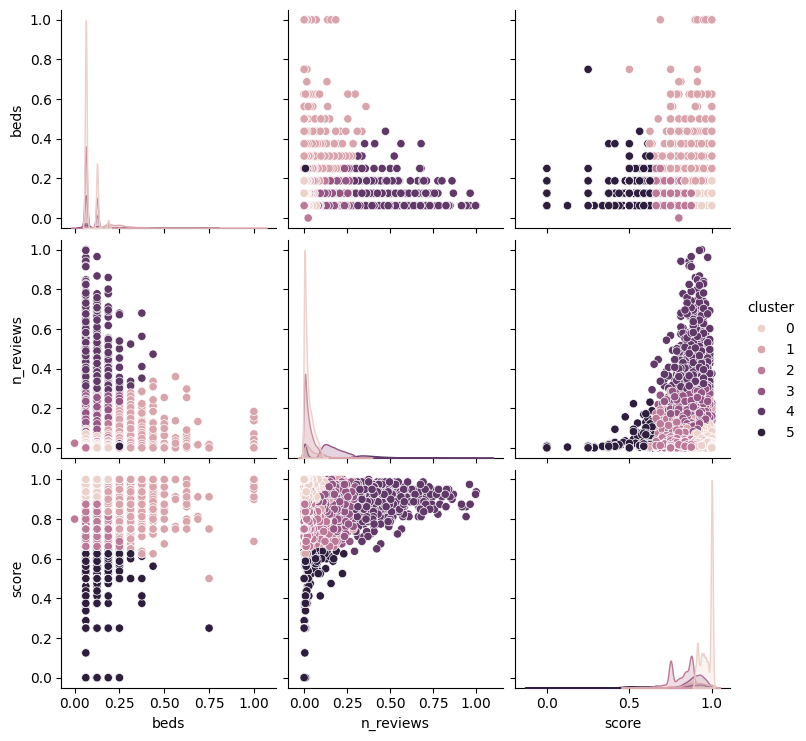

In [19]:
import seaborn as sns
sns.pairplot(data=Z,hue='cluster')

5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

In [20]:
X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
1         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0
4          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
5          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0

Cluster 1 has the highest rental price of 300. Following that is that is cluster 0 of 152. All the other clusters fall very closely in price.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

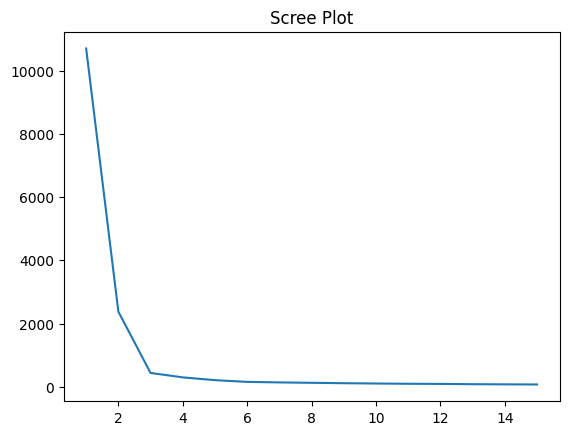

In [26]:
import numpy as np
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

price                                                            
           count        mean         std   min    25%    50%    75%      max
cluster                                                                     
0        11144.0  151.175879  152.020178  10.0   85.0  128.0  190.0  10000.0
1         8584.0  135.089352   96.618627  20.0   80.0  119.0  170.0   5000.0
2         2427.0  241.042027  232.898539  27.0  115.0  180.0  299.0   4500.0

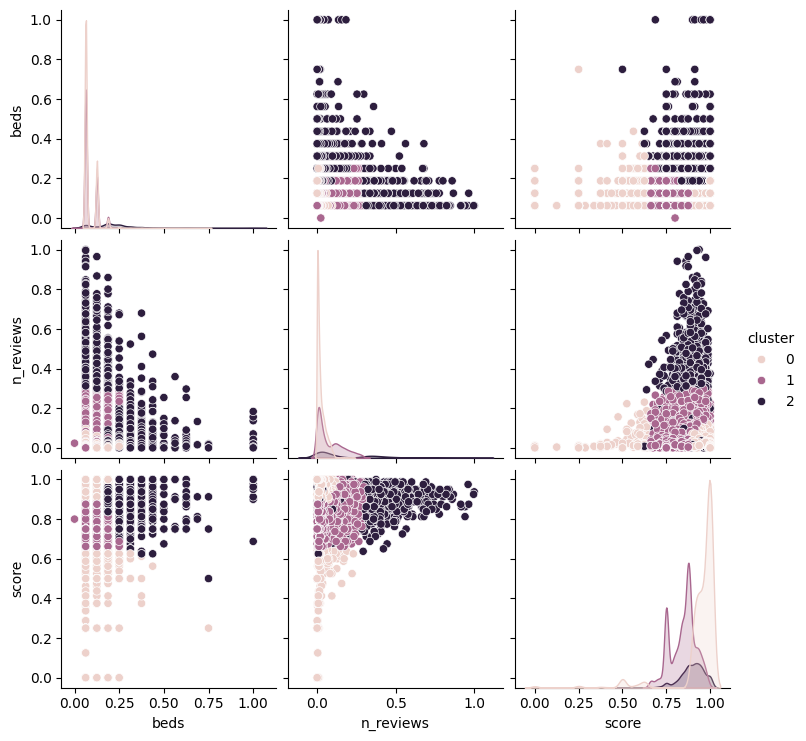

In [24]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for
model = model.fit(Z) # Fit the emodel
Z['cluster'] = model.labels_

sns.pairplot(data=Z,hue='cluster')

X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

Cluster 2 has the highest mean number of reviews by a lot.  However, cluster 2 has the lowest number mean average price which was not expected. Cluster 0 has a signficantly higher price count too.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.


In [27]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the
 points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

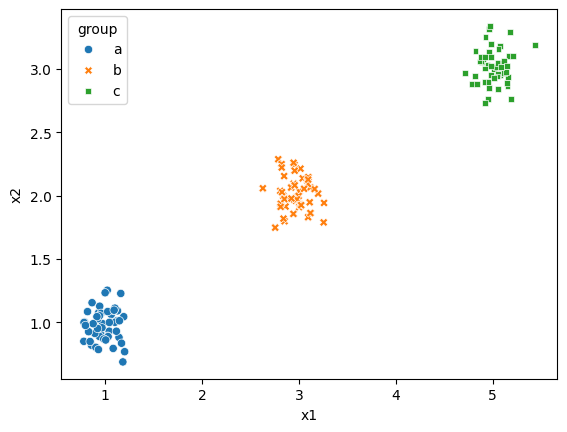

In [28]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

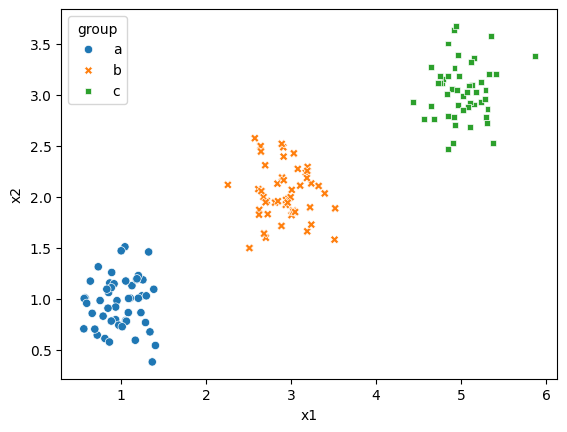

In [29]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

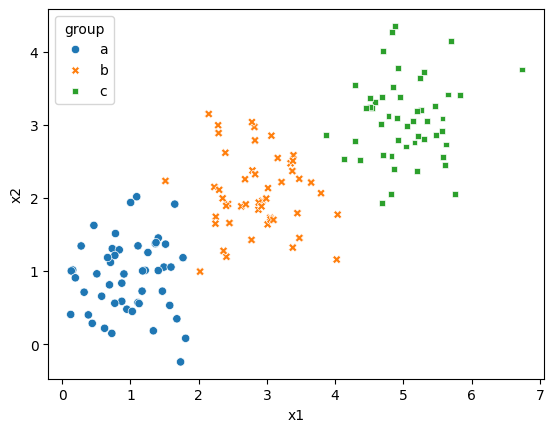

In [30]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

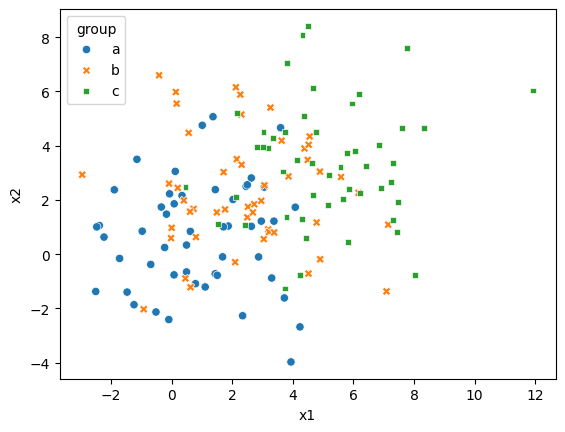

In [31]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

The quieter the noise, the more groups the cluster together. When the noise reaches 1 then the clusters start to mix and become less distinct

3.Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a


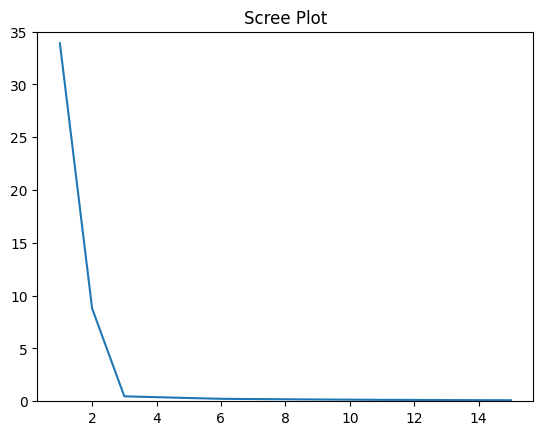

In [32]:
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

def scree(data):
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin)
    # scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(X)
        SSE[k] = model.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
    axes.set_ylim(0, 35)

scree( data = df0_125 )

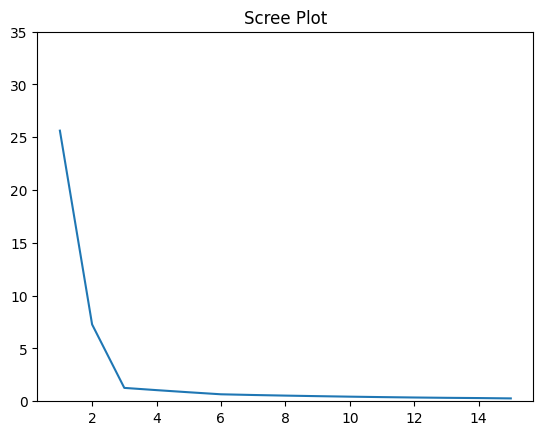

In [33]:
scree( data = df0_25 )

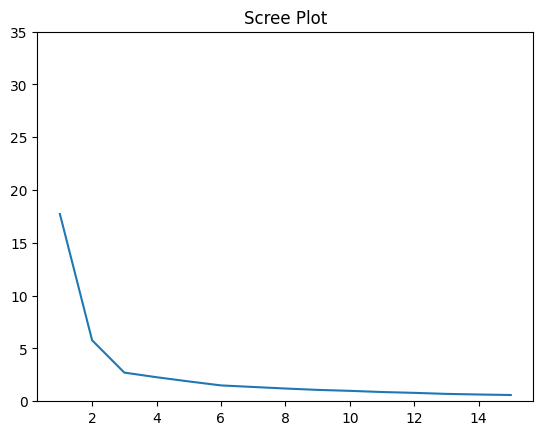

In [34]:
scree( data = df0_5 )

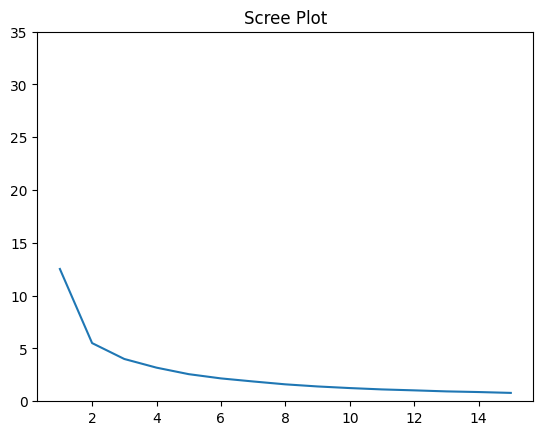

In [35]:
scree( df1_0 )

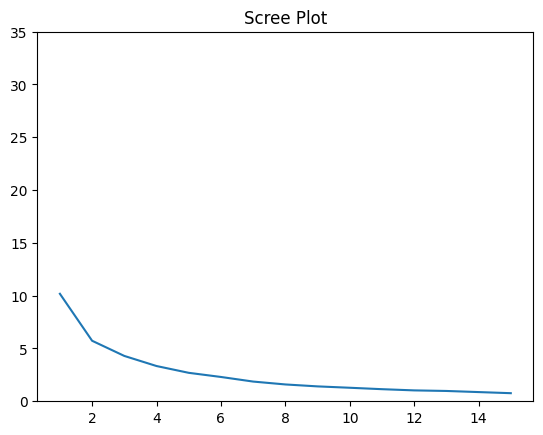

In [36]:
scree( df2_0 )

4.Explain the intuition of the elbow, using this numerical simulation as an example.

When the groups are not clustered together there is an obvious elbow on the scree plot. The addition of another cluster has a large marginal benefit because there is a large drop in the SSE or variability. As the noise is going up the clusters are getting closer together making the patterns of the data harder to detect and therefore not showing on the scree plot.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?